#Loading the MNIST dataset using Keras

We have used Keras library to load MNIST dataset and other packages required for the whole process.Here tensorflow is for building and training neural networks and the components like Convo2D, MaxPooling2D, etc., are for building neural network models

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

mnist.load_data() loads the MNIST dataset in which each image is a grayscale, 28x28 pixel matrix.

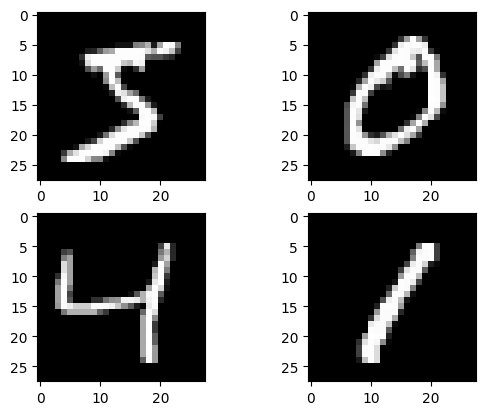

In [48]:
#Loading the mnist data just by calling mnist.load_data() function
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Ploting 4 images as gray scale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))

#Show the plot
plt.show()

In [49]:
train_images.shape

(60000, 28, 28)

In [50]:
test_images.shape

(10000, 28, 28)

# Reshaping



Converts the 2D images (28, 28) into 4D tensors (batch_size, 28, 28, 1) so they can be processed by a CNN.
Since the images are grayscale, the number of channels is set to 1.
".astype('float32')" is being used to convert pixel values to floating point numbers to normalize later on.

In [51]:
# Reshaping images to 4D tensors for CNN input (batch_size, height, width, channels)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')


In [52]:
train_images.shape

(60000, 28, 28, 1)

In [53]:
train_images[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

# Normalization

In the MNIST dataset, pixel values range from 0 to 255 (Gray Scale Images). To change values of [0, 255] to [0,1], we'll divide it by 255.
We are doing this because neural networks perform better with inputs in a precise range.

We also used one-hot encoding to represent categorical data in numerical format.It transforms the vector of class integers into a binary matrix

In [54]:
# Normalize inputs from 0-255 to 0-1
train_images = train_images / 255
test_images = test_images / 255

# One-hot encode outputs
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


# CNN Model

**First hidden layer:** Convo2D Layer with 32 feature maps each of size 3 x 3 filter

**ReLu function** to induce non-linearity and help in learning complex patterns.

Then **MaxPooling2D** layer(default size of 2 x 2) - we are using this to reduce spatial dimensions of the feature maps.

**2nd Convo2D layer** - 64 feature maps & a 3 x 3 filter along with ReLU. and again **MaxPooling2D** is performed.

In **flattening**, we are converting 2D matrix into 1D vector.So now we will a fully connected layer of 128 neurons.And again ReLU is performed.

 At last,the output layer has 10 neurons, corresponding to the 10 classes(0-9) in the MNIST dataset, and then the softmax activation function is performed which outputs probability-like predictions for each class,through which model  decides based on the highest probability.

In [55]:
#CNN Model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 filters, 3x3 size
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (3, 3), activation='relu')) # 64 filters, 3x3 size
    model.add(MaxPooling2D())
    model.add(Flatten()) # Flatten 2D to 1D
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

    # Compile the model using Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We used categorical_crossentropy because previously we have one-hot encoded the output labels.It calculates loss based on predicted probabilities. Low categorical_crossentropy implies better prediction.

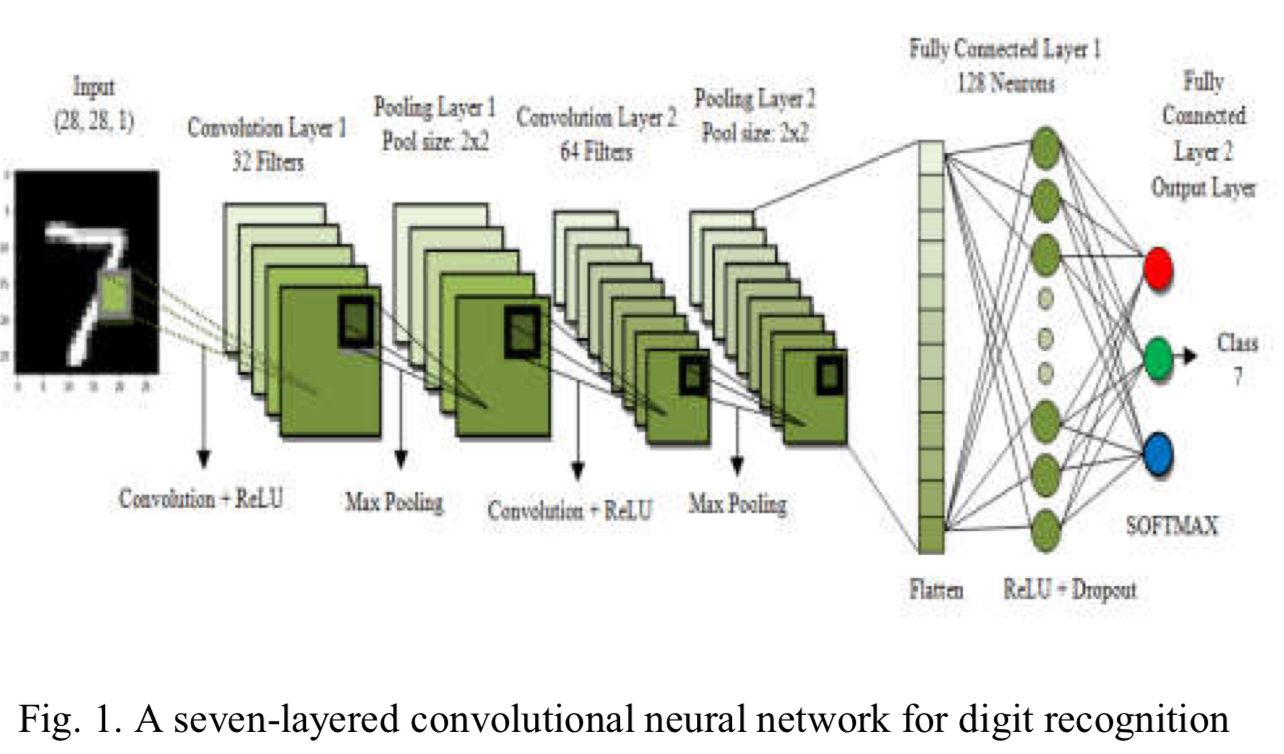

# Train the Model on Clean Data

Now, we will evaluate the model's performance on the test data after each epoch(one complete run through the training data).

In [56]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8594 - loss: 0.4888 - val_accuracy: 0.9820 - val_loss: 0.0591
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9821 - loss: 0.0588 - val_accuracy: 0.9849 - val_loss: 0.0441
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9884 - loss: 0.0375 - val_accuracy: 0.9895 - val_loss: 0.0309
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9890 - val_loss: 0.0289
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9901 - val_loss: 0.0314


# Generate Adversarial Examples using PGD

In adversarial training,we are going to use few elements like epsilon ( for limiting the maximum perturbation ),
alpha ( controls the step size for each incremental perturbation )

*   images = images + alpha * signed_grad



In [57]:
def generate_adversarial_examples(model, images, labels, epsilon=0.1, alpha=0.01, iterations=10):
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels)  #For tensorflow operations, we need to convert images and labels to tensors
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(images)
            predictions = model(images)
            loss = tf.keras.losses.categorical_crossentropy(labels, predictions)  #Here we're calculating loss between true labels and predictions
        gradients = tape.gradient(loss, images)               #This tells us how to change the images to minimize the loss
        signed_grad = tf.sign(gradients)
        images = images + alpha * signed_grad    #Here were are updating pixel values by adding signed gradients scaled by alpha
        images = tf.clip_by_value(images, 0, 1)  #To ensure pixel values remain b/w 0 to 1
    return images.numpy()

# Generating adversarial examples from the test set
adv_test_images = generate_adversarial_examples(model, test_images, test_labels)


# Visualisation of Adversarial Examples

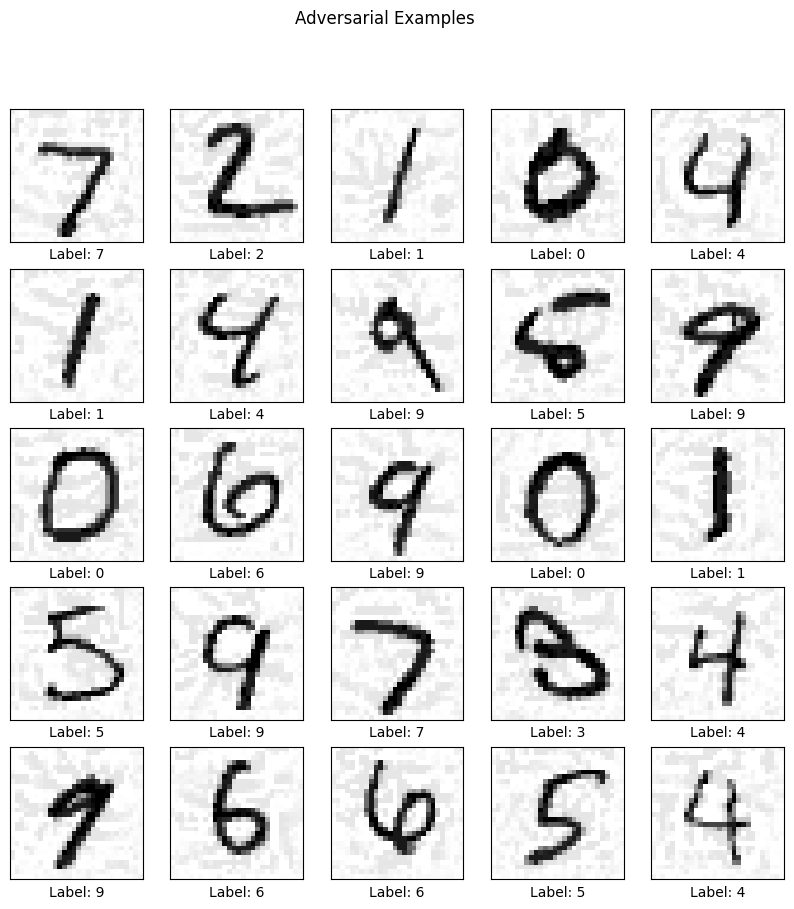

In [58]:
def plot_images(images, labels, predictions=None, title="Images"):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        if predictions is None:
            plt.xlabel(f"Label: {np.argmax(labels[i])}")
        else:
            plt.xlabel(f"Label: {np.argmax(labels[i])}, Pred: {np.argmax(predictions[i])}")
    plt.suptitle(title)
    plt.show()

plot_images(adv_test_images, test_labels, title="Adversarial Examples")


# Adversarial Training

Improving the robustness of a neural network model by training it on both clean and adversarial examples.

In [59]:
# Adversarial training function
def adversarial_training(model, train_images, train_labels, epochs=5, batch_size=128, iterations=5):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        # one batch of 128 processed each time
        for i in range(0, len(train_images), batch_size):
            batch_images = train_images[i:i+batch_size]
            batch_labels = train_labels[i:i+batch_size]

            # Generating adversarial examples for the batch
            adv_batch_images = generate_adversarial_examples(model, batch_images, batch_labels, iterations=iterations)

           # getting the combined whole data(clean + adversarial)
            mixed_images = np.concatenate([batch_images, adv_batch_images])
            mixed_labels = np.concatenate([batch_labels, batch_labels])

            # Training the model on the combined data
            model.fit(mixed_images, mixed_labels, epochs=1, verbose=0)

        print(f"Adversarial training for epoch {epoch + 1} completed.")

adversarial_training(model, train_images, train_labels, epochs=5, batch_size=128, iterations=5)


Epoch 1/5
Adversarial training for epoch 1 completed.
Epoch 2/5
Adversarial training for epoch 2 completed.
Epoch 3/5
Adversarial training for epoch 3 completed.
Epoch 4/5
Adversarial training for epoch 4 completed.
Epoch 5/5
Adversarial training for epoch 5 completed.


# Evaluation of Model’s Robustness

Evaluating the performance of the trained model on both clean and adversarial test datasets.

In [60]:
#Checking accuracy on clean test images
clean_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Accuracy on clean test data: {clean_accuracy[1]:.4f}")

#On adversarial test images
adv_accuracy = model.evaluate(adv_test_images, test_labels, verbose=0)
print(f"Accuracy on adversarial test data: {adv_accuracy[1]:.4f}")


Accuracy on clean test data: 0.9914
Accuracy on adversarial test data: 0.9736
